In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

In [9]:
def scale_df(dataframe, columns):
    for col in columns:
        dataframe[col] = (dataframe[col] - dataframe[col].min()) / (dataframe[col].max() - dataframe[col].min())

In [11]:
# Reading the combined data set
data = pd.read_csv("Data/full_dat.csv", index_col=[0,1])
data.dropna(inplace=True)
sent_columns = ['neg', 'neu', 'pos']
happy_columns = ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']
scale_df(data, sent_columns + happy_columns)

In [12]:
data.head()

iso3 ISO-alpha3 Code Region Name Sub-region Name  \
Country Year                                                    
Austria 2006  AUT             AUT      Europe  Western Europe   
        2008  AUT             AUT      Europe  Western Europe   
        2010  AUT             AUT      Europe  Western Europe   
        2011  AUT             AUT      Europe  Western Europe   
        2012  AUT             AUT      Europe  Western Europe   

             Developed / Developing Countries  Session  \
Country Year                                             
Austria 2006                        Developed       61   
        2008                        Developed       63   
        2010                        Developed       65   
        2011                        Developed       66   
        2012                        Developed       67   

                                                         Speech       neg  \
Country Year                                                                
Austria 2006  “United in diversity”: \nthis motto of the Eur...  0.236220   
        2008  These days, on our \ntelevision screens, image...  0.251969   
        2010  The tragic \nearthquake in Haiti, the devastat...  0.181102   
        2011  This year has once \nagain confirmed the impor...  0.192913   
        2012  The events of recent\nmonths have illustrated ...  0.314961   

                   neu       pos  Life Ladder  Log GDP per capita  \
Country Year                                                        
Austria 2006  0.490706  0.497738     0.848336            0.839167   
        2008  0.267658  0.751131     0.858834            0.848089   
        2010  0.323420  0.764706     0.880587            0.843064   
        2011  0.416357  0.638009     0.910580            0.848138   
        2012  0.304833  0.633484     0.898102            0.848582   

              Social support  Healthy life expectancy at birth  \
Country Year                                                     
Austria 2006        0.926856                          0.858482   
        2008        0.924335                          0.865625   
        2010        0.895074                          0.872768   
        2011        0.938053                          0.875893   
        2012        0.939467                          0.879018   

              Freedom to make life choices  Generosity  \
Country Year                                             
Austria 2006                      0.939812    0.622269   
        2008                      0.854175    0.611455   
        2010                      0.877415    0.454852   
        2011                      0.937027    0.455522   
        2012                      0.910019    0.442076   

              Perceptions of corruption  Positive affect  Negative affect  
Country Year                                                               
Austria 2006                   0.479827         0.806223         0.137179  
        2008                   0.610105         0.820798         0.135927  
        2010                   0.538929         0.792740         0.100642  
        2011                   0.704080         0.752143         0.079240  
        2012                   0.775662         0.804845         0.102431

# Distribution of columns

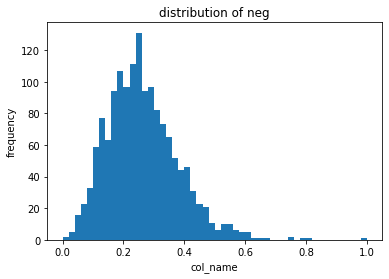

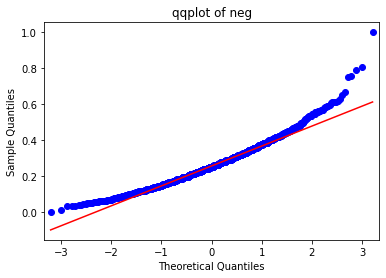

3.1714226694423433e-18


In [32]:
def view_distibution(dataframe, col_name, n_bins=50):
    x = dataframe[col_name]
    plt.hist(x, bins=n_bins)
    plt.ylabel('frequency')
    plt.xlabel('col_name')
    plt.title('distribution of ' + col_name)
    plt.show()
    
    sm.qqplot(x, line ='q')
    plt.title('qqplot of ' + col_name)
    plt.show()
    
    p_value = stats.shapiro(x)[1]
    print("P-value is: " + str(p_value))
    if p_value > 0.05:
        print("So the data follow the normal distribution")
    else:
        print("So the data does ")
    
    
    
view_distibution(data, 'neg')